In [ ]:
import numpy as np
from scipy.sparse import load_npz
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import os

PROCESSED_DIR = "../data/processed/text_data/"
HYBRID_DIR = "../data/processed/hybrid"
X_TRAIN_PATH = os.path.join(PROCESSED_DIR, "X_train.npz")
X_TEST_PATH = os.path.join(PROCESSED_DIR, "X_test.npz")
Y_TRAIN_PATH = os.path.join(PROCESSED_DIR, "y_train.npy")
Y_TEST_PATH = os.path.join(PROCESSED_DIR, "y_test.npy")

print("Eğitim ve test verileri yükleniyor...")
X_train = load_npz(X_TRAIN_PATH)
X_test = load_npz(X_TEST_PATH)
y_train = np.load(Y_TRAIN_PATH)
y_test = np.load(Y_TEST_PATH)

Eğitim ve test verileri yükleniyor...


In [ ]:
log_reg_model = LogisticRegression(solver="saga", max_iter=1000, random_state=0)
print("model oluşturuldu")
log_reg_model.fit(X_train, y_train)
print("model eğitildi")
y_pred = log_reg_model.predict(X_test)

model oluşturuldu
model eğitildi


In [3]:
print("tahmin yapıldı")
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Gerçek (0)', 'Spam (1)']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

tahmin yapıldı

Accuracy: 0.9187

Classification Report:
              precision    recall  f1-score   support

  Gerçek (0)       0.85      0.76      0.81   1122587
    Spam (1)       0.93      0.96      0.95   3930058

    accuracy                           0.92   5052645
   macro avg       0.89      0.86      0.88   5052645
weighted avg       0.92      0.92      0.92   5052645


Confusion Matrix:


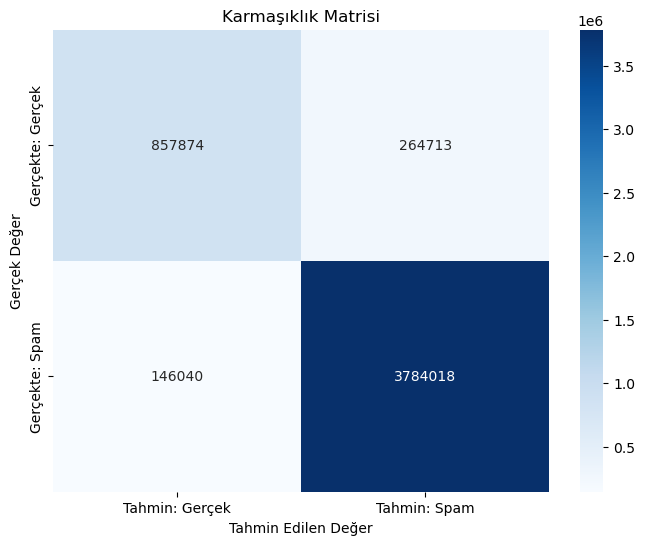

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
  xticklabels=['Tahmin: Gerçek', 'Tahmin: Spam'], 
  yticklabels=['Gerçekte: Gerçek', 'Gerçekte: Spam'])

plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.title('Karmaşıklık Matrisi')
plt.show()


In [ ]:
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]
threshold = 0.70

new_pred = (y_pred_proba >= threshold).astype(int)
print("tahmin yapıldı")
accuracy = accuracy_score(y_test, new_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, new_pred, target_names=['Gerçek (0)', 'Spam (1)']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, new_pred)

tahmin yapıldı

Accuracy: 0.9010

Classification Report:
              precision    recall  f1-score   support

  Gerçek (0)       0.73      0.88      0.80   1122587
    Spam (1)       0.96      0.91      0.93   3930058

    accuracy                           0.90   5052645
   macro avg       0.85      0.89      0.87   5052645
weighted avg       0.91      0.90      0.90   5052645


Confusion Matrix:


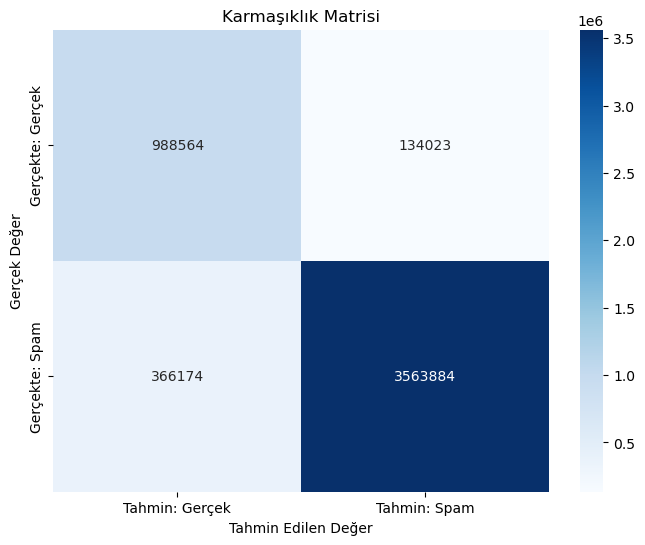

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
  xticklabels=['Tahmin: Gerçek', 'Tahmin: Spam'], 
  yticklabels=['Gerçekte: Gerçek', 'Gerçekte: Spam'])

plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.title('Karmaşıklık Matrisi')
plt.show()

In [19]:
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]
threshold = 0.71

new_pred = (y_pred_proba >= threshold).astype(int)
print("tahmin yapıldı")
accuracy = accuracy_score(y_test, new_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, new_pred, target_names=['Gerçek (0)', 'Spam (1)']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, new_pred)

tahmin yapıldı

Accuracy: 0.9078

Classification Report:
              precision    recall  f1-score   support

  Gerçek (0)       0.76      0.86      0.81   1122587
    Spam (1)       0.96      0.92      0.94   3930058

    accuracy                           0.91   5052645
   macro avg       0.86      0.89      0.87   5052645
weighted avg       0.91      0.91      0.91   5052645


Confusion Matrix:


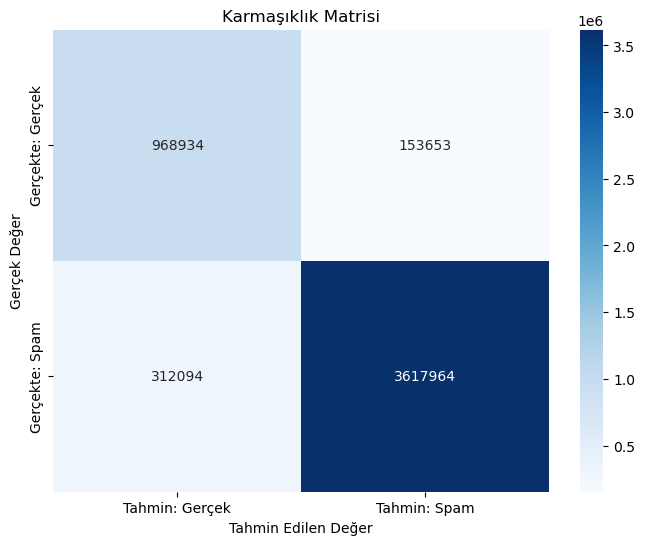

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
  xticklabels=['Tahmin: Gerçek', 'Tahmin: Spam'], 
  yticklabels=['Gerçekte: Gerçek', 'Gerçekte: Spam'])

plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.title('Karmaşıklık Matrisi')
plt.show()

# Model 70 - 75 thresholdlarında aynı sonucu veriyor. Maximum değer 0.71de

In [21]:
log_reg_model = LogisticRegression(solver="saga", max_iter=1000, random_state=0, class_weight={0:1,1:1.5})
print("model yeni ceza parametreleri ile yeniden oluşturuldu")
log_reg_model.fit(X_train, y_train)
print("model eğitildi")
y_pred = log_reg_model.predict(X_test)

model yeni ceza parametreleri ile yeniden oluşturuldu
model eğitildi


In [22]:
print("tahmin yapıldı")
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Gerçek (0)', 'Spam (1)']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

tahmin yapıldı

Accuracy: 0.9157

Classification Report:
              precision    recall  f1-score   support

  Gerçek (0)       0.89      0.71      0.79   1122587
    Spam (1)       0.92      0.97      0.95   3930058

    accuracy                           0.92   5052645
   macro avg       0.90      0.84      0.87   5052645
weighted avg       0.91      0.92      0.91   5052645


Confusion Matrix:


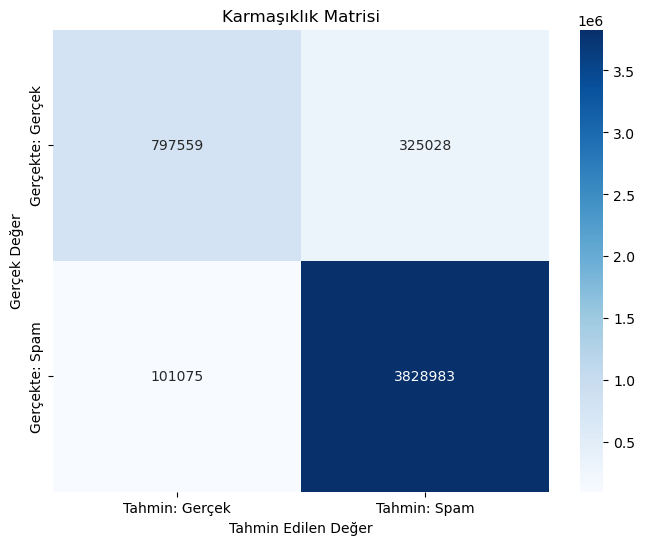

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
  xticklabels=['Tahmin: Gerçek', 'Tahmin: Spam'], 
  yticklabels=['Gerçekte: Gerçek', 'Gerçekte: Spam'])

plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.title('Karmaşıklık Matrisi')
plt.show()

In [29]:
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]
threshold = 0.71

new_pred = (y_pred_proba >= threshold).astype(int)
print("tahmin yapıldı")
accuracy = accuracy_score(y_test, new_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, new_pred, target_names=['Gerçek (0)', 'Spam (1)']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, new_pred)

tahmin yapıldı

Accuracy: 0.9164

Classification Report:
              precision    recall  f1-score   support

  Gerçek (0)       0.81      0.82      0.81   1122587
    Spam (1)       0.95      0.94      0.95   3930058

    accuracy                           0.92   5052645
   macro avg       0.88      0.88      0.88   5052645
weighted avg       0.92      0.92      0.92   5052645


Confusion Matrix:


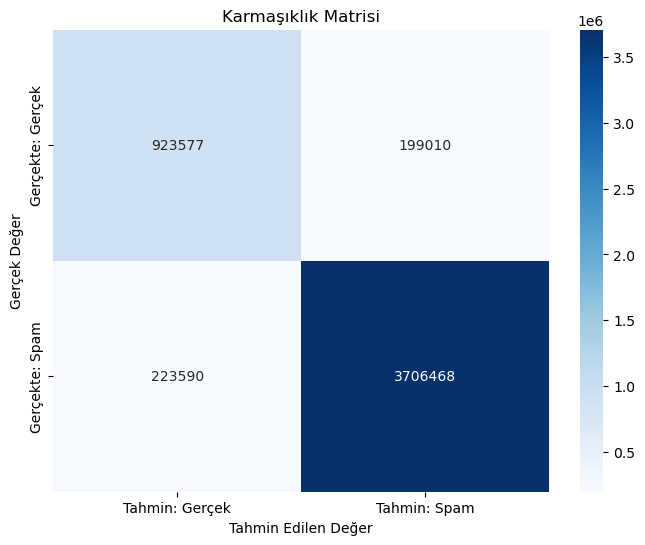

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
  xticklabels=['Tahmin: Gerçek', 'Tahmin: Spam'], 
  yticklabels=['Gerçekte: Gerçek', 'Gerçekte: Spam'])

plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.title('Karmaşıklık Matrisi')
plt.show()

In [ ]:
CELL_PHONES_ACCESSORIES = os.path.join(HYBRID_DIR, "Cell_Phones_and_Accessories")
CLOTHING_SHOES_JEWELRY = os.path.join(HYBRID_DIR, "Clothing_Shoes_and_Jewelry")
ELECTRONICS = os.path.join(HYBRID_DIR, "Electronics")
HOME_KITCHEN = os.path.join(HYBRID_DIR, "Home_and_Kitchen")
SPORTS_OUTDOORS = os.path.join(HYBRID_DIR, "Sports_and_Outdoors")
TOYS_GAMES = os.path.join(HYBRID_DIR, "Toys_and_Games")


In [ ]:
X_train_electronic = load_npz(os.path.join(ELECTRONICS, "X_train.npz"))
X_test_electronic = load_npz(os.path.join(ELECTRONICS, "X_test.npz"))
y_train_electronic = load_npz(os.path.join(ELECTRONICS, "y_train.npz"))
y_test_electronic = load_npz(os.path.join(ELECTRONICS, "y_test.npz"))

In [ ]:
log_reg_model.fit(X_train_electronic, y_train_electronic)
print("model eğitildi")
y_pred_electronic = log_reg_model.predict(X_test_electronic)

In [ ]:
print("tahmin yapıldı")
accuracy = accuracy_score(y_test_electronic, y_pred_electronic)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_electronic, y_pred_electronic, target_names=['Gerçek (0)', 'Spam (1)']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_electronic, y_pred_electronic)

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
  xticklabels=['Tahmin: Gerçek', 'Tahmin: Spam'], 
  yticklabels=['Gerçekte: Gerçek', 'Gerçekte: Spam'])

plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.title('Karmaşıklık Matrisi')
plt.show()